### Initalizing spark

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Georgia_rentalPrice-Copy1") \
    .config("spark.executor.memory", '8g') \
    .config('spark.executor.cores', '4') \
    .config('spark.cores.max', '4') \
    .config("spark.driver.memory",'8g') \
    .getOrCreate()

sc = spark.sparkContext
sqlCtx = SQLContext(sc)

Downloading the data as a pandas data frame.

In [2]:
train_data_pd = pd.read_json("data/train.json")

Taking a look at the data.

In [5]:
train_data_pd

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street,medium
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street,low
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street,low
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace,medium
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th,low


Create a pySpark DataFrame of the pandas Data Frame.

In [3]:
train_data_df = sqlCtx.createDataFrame(train_data_pd)

Printing the schema. Seems to be ok for most part. The `created` should be changed from string to time object.

In [5]:
train_data_df.printSchema()

root
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- building_id: string (nullable = true)
 |-- created: string (nullable = true)
 |-- description: string (nullable = true)
 |-- display_address: string (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- latitude: double (nullable = true)
 |-- listing_id: long (nullable = true)
 |-- longitude: double (nullable = true)
 |-- manager_id: string (nullable = true)
 |-- photos: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- price: long (nullable = true)
 |-- street_address: string (nullable = true)
 |-- interest_level: string (nullable = true)



Show the first row in the pySpark Data Frame.

In [6]:
train_data_df.show(1)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|      []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
+---------+--------+--------------------+-------------------+--------------------+--------------

Printing the `bathrooms` column and sorting on the most frequent number of bathrooms.

In [7]:
train_data_df.groupBy('bathrooms').count().sort('count', ascending=False).show()

+---------+-----+
|bathrooms|count|
+---------+-----+
|      1.0|39422|
|      2.0| 7660|
|      3.0|  745|
|      1.5|  645|
|      0.0|  313|
|      2.5|  277|
|      4.0|  159|
|      3.5|   70|
|      4.5|   29|
|      5.0|   20|
|      5.5|    5|
|      6.0|    4|
|      7.0|    1|
|      6.5|    1|
|     10.0|    1|
+---------+-----+



Checking out the apartment with 10 bathrooms.

In [8]:
train_data_df.filter(train_data_df["bathrooms"] == 10.0).show()

+---------+--------+--------------------+-------------------+--------------------+---------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+---------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------+--------------+
|     10.0|       2|424f8014bddc288d2...|2016-04-09 04:34:31|***The building?s...|       W 52 St.|[Doorman, Elevato...| 40.7633|   6849204| -73.9849|0c71a59cb70215fbf...|[https://photos.r...| 3600|  260 W 52 St.|           low|
+---------+--------+--------------------+-------------------+--------------------+------

We we that it is a room with 2 bedrooms. Highly likely that it is a typo. We continue to check out the rental with 7 and 6.5 bathrooms.

In [9]:
train_data_df.filter((train_data_df["bathrooms"] == 7.0) | (train_data_df["bathrooms"] == 6.5) ).show()

+---------+--------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|     display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      6.5|       7|3be1175591e290053...|2016-06-22 03:15:54|This landmark Eng...|206 Upper Mountai...|[Garage, Garden, ...| 40.8336|   7198431|  -74.216|1d019cccf631394cd...|[https://photos.r...|14500|206 Upper Mountai...|           low|
|      7.0|       5|                   0|201

We see that these are way more expensive than the rental with 10 bathrooms which further the suspision that it is a typo. 

Printing the `bedrooms` column and sorting on the most frequent number of bedrooms.

In [10]:
train_data_df.groupBy('bedrooms').count().sort('count', ascending=False).show()

+--------+-----+
|bedrooms|count|
+--------+-----+
|       1|15752|
|       2|14623|
|       0| 9475|
|       3| 7276|
|       4| 1929|
|       5|  247|
|       6|   46|
|       7|    2|
|       8|    2|
+--------+-----+



Check out the 8 room apartments.

In [11]:
train_data_df.filter((train_data_df["bedrooms"] == 8)).show()

+---------+--------+--------------------+-------------------+--------------------+----------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+----------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description| display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|  street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+----------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+----------------+--------------+
|      4.0|       8|2d51ec2a54cf05468...|2016-06-25 06:09:20|Gorgeous 8 bedroo...|      Greene Ave|[Hardwood Floors,...| 40.6881|   7217045| -73.9553|9ba3641676cc717a8...|                  []| 6500|  393 Greene Ave|           low|
|      3.0|       8|f8bff653aae7c7555...|2016-06-13 02:47:37|Please note tha

We check for the `building_id` and conclude that we have 8286 missing values here.

In [12]:
train_data_df.groupBy('building_id').count().sort('count', ascending=False).show(5)

+--------------------+-----+
|         building_id|count|
+--------------------+-----+
|                   0| 8286|
|96274288c84ddd7d5...|  275|
|11e1dec9d14b1a9e5...|  215|
|80a120d6bc3aba97f...|  213|
|bb8658a3e432fb62a...|  212|
+--------------------+-----+
only showing top 5 rows



Displaying the `created` column.

In [13]:
train_data_df[["created"]].show(5)

+-------------------+
|            created|
+-------------------+
|2016-06-24 07:54:24|
|2016-06-12 12:19:27|
|2016-04-17 03:26:41|
|2016-04-18 02:22:02|
|2016-04-28 01:32:41|
+-------------------+
only showing top 5 rows



Changing the `created` column to timestamp objects instead of strings.

In [14]:
train_data_df = train_data_df.withColumn("created", F.to_timestamp("created"))

We create a coulm called `Day_of_week` which contains the day of the week the rental was created.

In [15]:
day_of_week = train_data_df.withColumn("Day_of_week", F.dayofweek(train_data_df["created"]))
day_of_week = day_of_week[["Day_of_week"]]
day_of_week.show(5)

+-----------+
|Day_of_week|
+-----------+
|          6|
|          1|
|          1|
|          2|
|          5|
+-----------+
only showing top 5 rows



We want to plot the count of the different days that the rental was created.

In [16]:
day_of_week_pd = day_of_week.toPandas()

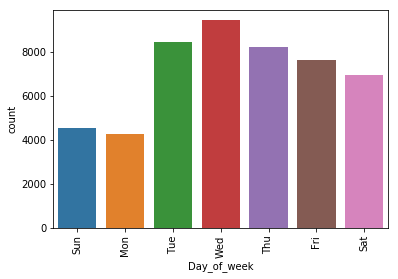

In [17]:
ax = sns.countplot(x="Day_of_week", data = day_of_week_pd)
ax.set_xticklabels(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"], rotation='vertical', fontsize=10)
plt.show()

We create a data frame with `longitude` and `latitude` in order to plot the positioning of the rental unit on a map.

In [21]:
long_lat_df = train_data_df[["longitude", "latitude"]]

In [19]:
long_lat_df.show(5)

+---------+--------+
|longitude|latitude|
+---------+--------+
| -73.9425| 40.7145|
| -73.9667| 40.7947|
| -74.0018| 40.7388|
| -73.9677| 40.7539|
| -73.9493| 40.8241|
+---------+--------+
only showing top 5 rows



Printing a statistic summary, mostly to see if there were any strange values. Which there were since we dont think that there are any rental units with longitude and latitude = 0.0

In [20]:
long_lat_df.describe().show()

+-------+------------------+------------------+
|summary|         longitude|          latitude|
+-------+------------------+------------------+
|  count|             49352|             49352|
|   mean|-73.95571552115474| 40.74154482290508|
| stddev|1.1779119215716662|0.6385353439544775|
|    min|          -118.271|               0.0|
|    max|               0.0|           44.8835|
+-------+------------------+------------------+



We see how many rental units that have longitude and latitude = 0.0

In [21]:
print("Number of observations with missing longitude: {}" .format(long_lat_df.filter(long_lat_df["longitude"] == 0.0).count()))
print("Number of observations with missing latitude: {}" .format(long_lat_df.filter(long_lat_df["latitude"] == 0.0).count()))

Number of observations with missing longitude: 12
Number of observations with missing latitude: 12


Could these be the same observations?

In [22]:
print("Number of observations with missing longitude and latitude: {}".format(long_lat_df.filter((long_lat_df["latitude"] == 0.0) & (long_lat_df["longitude"] == 0.0)).count()))

Number of observations with missing longitude and latitude: 12


Yes they are... So how many are remaining?

In [23]:
long_lat_df.filter(long_lat_df["latitude"] != 0.0).count()

49340

To plot the apartments we use the package `folium` which can make interactive plots and we can get more information of the rental units in the plot.

Inspiration from blogpost: https://nbviewer.jupyter.org/github/vincentropy/python_cartography_tutorial/blob/master/part1_basic_folium_maps.ipynb

In [20]:
!pip install --upgrade folium
import folium

    100% |████████████████████████████████| 92kB 5.7MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/63/36/1c93318e9653f4e414a2e0c3b98fc898b4970e939afeedeee6075dd3b703/branca-0.3.1-py3-none-any.whl
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


We create a function that places each of the units on the map. The color of the apartment corresponds to the factor `interest_level` which has not been investigated thoroughly yet. The size of the circle is based on the price which can be displayed by *klicking* the circle, along with the `street_address`.

In [22]:
def plot_rental_locatinos(rental_locatinos):
        # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

            
    for index, row in rental_locatinos.iterrows():
        
            popup_text = "{}<br> Price: {}<br>"
            popup_text = popup_text.format(row["street_address"], row["price"])
            
            if row["interest_level"] == 'high':
                color="#007849" # green
            if row["interest_level"] == 'medium':
                color="#FFCE00" # yellow 
            if row["interest_level"] == 'low':
                color="#FFCE99" # orange
                
            radius = row["price"]/1000
        
            folium.CircleMarker(location=(row["latitude"],
                                      row["longitude"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

Since our data set is too big for all rental units to be displayed a subsample of 1000 units are changed into a pandas data frame which is then plotted using the above constructed function `plot_rental_locatinos`.

In [23]:
sample_pd = train_data_pd.sample(n = 1000)

The user constructed function `plot_rental_locatinos`

In [24]:
plot_rental_locatinos(sample_pd)

We want to explode and split on the column `features`. So that each feature gets it's own column with binary values.

In [29]:
list = train_data_df[["features"]].collect()[1][0]
list

['Doorman', 'Elevator', 'Fitness Center', 'Cats Allowed', 'Dogs Allowed']

We first have to handele the rentals with missing featurses by adding `missing` as a feature. Here are the 2 first listings with missing features.

In [30]:
train_data_df.filter(F.size("features")==0).show(2)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|      []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
|      2.0|       4|38a913e46c94a7f46...|2016-04-19 04:24:47|                    |   West 18th S

In [ ]:
def fillMissing(features):
    if(len(features) == 0): return ['Missing Feature']
    else : return features

fill_missing_udf = F.udf(fillMissing)

#train_data_df2 = train_data_df.withColumn("features" , fill_missing_udf(F.col("features")))

In [ ]:
train_data_df2[["features"]].show(10)

In [ ]:
train_data_df2[["features"]].collect()[1][0]

In [ ]:
train_data_df2.withColumn("ex_features", F.explode(train_data_df2.features)).show(5)

In [ ]:
train_data_df.withColumn("ex_features", F.explode(train_data_df.features)).show(5)

# Georgia's work

I will explore the descriptions

In [5]:
train_data_df.show(3)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|                  []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
|      1.0|       2|c5c8a357cba207596...|2016-06

In [6]:
# Check out this column
train_data_df.select(["description"]).show(20)

+--------------------+
|         description|
+--------------------+
|A Brand New 3 Bed...|
|                    |
|Top Top West Vill...|
|Building Amenitie...|
|Beautifully renov...|
|                    |
|Stunning unit wit...|
|This huge sunny ,...|
|<p><a  website_re...|
|This is a spaciou...|
|New to the market...|
|Check out this on...|
|***LOW FEE. Beaut...|
|Lincoln Square's ...|
|Spacious 1-Bedroo...|
|Stunning  full re...|
|East Village is a...|
|*Location: Thayer...|
|                    |
|                    |
+--------------------+
only showing top 20 rows



At first glance, it looks like we've got some missing values, use of special characters (** for instance), and capital letters might be important.

In [6]:
train_data_df.select(["description"]).count()

49352

## Formatting the data
adding columns, removing words etc.

In [4]:
# need to code numbers for the interest level
#train_data_df2 = train_data_df.withColumn("interest_level", if("interest_level"==0, "low"))


from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

def modify_values(r):
    if r == "high":
        return 2
    else:
        if r == "medium":
            return 1
        else:
            return 0
    
ol_val = udf(modify_values, StringType())
new_df = train_data_df.withColumn("interest_level",ol_val(train_data_df.interest_level))
new_df.show(2)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|                  []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|             1|
|      1.0|       2|c5c8a357cba207596...|2016-06

In [5]:
train_data_df2 = new_df.select("interest_level","description")
train_data_df2.groupBy("interest_level").count().show()

+--------------+-----+
|interest_level|count|
+--------------+-----+
|             0|34284|
|             1|11229|
|             2| 3839|
+--------------+-----+



In [6]:
# Add columns for some potentially interesting aspects

train3 = train_data_df2.withColumn('exclamation', F.expr("IF(INSTR(description, '!') > 0, 1, 0)"))\
.withColumn('star', F.expr("IF(INSTR(description, '*') > 0, 1, 0)"))\
.withColumn('missing', F.expr("IF(INSTR(description, '        ') > 0, 1, 0)"))\
.withColumn('no fee', F.expr("IF(INSTR(description, 'no fee')|INSTR(description, 'NO FEE') >0,1,0)"))\
.withColumn('eq opp', F.expr("IF(INSTR(description, 'equal opportunity')|INSTR(description, 'EQUAL OPPORTUNITY')|INSTR(description, 'Equal opportunity') >0,1,0)"))
train3.show(2)

+--------------+--------------------+-----------+----+-------+------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|
+--------------+--------------------+-----------+----+-------+------+------+
|             1|A Brand New 3 Bed...|          1|   0|      0|     0|     0|
|             0|                    |          0|   0|      1|     0|     0|
+--------------+--------------------+-----------+----+-------+------+------+
only showing top 2 rows



In [17]:
train3_CP = train_data_df2.withColumn('cp', F.expr("IF(INSTR(description, 'water') > 0, 1, 0)"))
train3_CP.groupBy("cp").count().show()

+---+-----+
| cp|count|
+---+-----+
|  1| 2377|
|  0|46975|
+---+-----+



Using a handy-dandy tutorial from https://wesslen.github.io/twitter/predicting_twitter_profile_location_with_pyspark/

In [10]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression

# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="description", outputCol="words", pattern="\\W") # I don't know what W is...

# stop words
add_stopwords = ["a","the","it","of","the","is","and", # standard stop words
     "A","this","in","for"]
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000, minDF=5)



In [14]:
from pyspark.ml import Pipeline
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType


pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(train3)
dataset = pipelineFit.transform(train3)
dataset = dataset.withColumn("label", dataset["interest_level"].cast(IntegerType()))
dataset.show(4)

+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|            filtered|            features|label|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|             1|A Brand New 3 Bed...|          1|   0|      0|     0|     0|[a, brand, new, 3...|[brand, new, 3, b...|(10000,[0,1,3,5,6...|    1|
|             0|                    |          0|   0|      1|     0|     0|                  []|                  []|       (10000,[],[])|    0|
|             2|Top Top West Vill...|          1|   0|      0|     0|     0|[top, top, west, ...|[top, top, west, ...|(10000,[0,1,2,3,4...|    2|
|             0|Building Amenitie...|          1|   1|      0|     1|     0|[building, amenit...|[building, amenit...|(10000

## First method = count vector

In [23]:
(train_set, test_set) = dataset.randomSplit([0.8, 0.2], seed = 1337)
#train_set.show(2) # BULLCRAP

trythis = dataset.toPandas()

from sklearn.model_selection import train_test_split
train, test = train_test_split(trythis, test_size=0.2, random_state=1337)
# BECAUSE STUPID PYSPARK DF DOES NOT WORKKKKKK

# Convert back to spark df
train2 = sqlCtx.createDataFrame(train)
train2.show(2)
test2 = sqlCtx.createDataFrame(test)

+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|            filtered|            features|label|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|             0|STUNNING LUXURY 2...|          1|   0|      0|     0|     0|[stunning, luxury...|[stunning, luxury...|(10000,[0,1,2,3,4...|    0|
|             0|The new downtown ...|          0|   0|      0|     0|     0|[the, new, downto...|[new, downtown, f...|(10000,[0,2,4,5,6...|    0|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
only showing top 2 rows



In [24]:
# Build the model
mlr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0, family = "multinomial")

# Train model with Training Data
mlrModel = mlr.fit(train2)

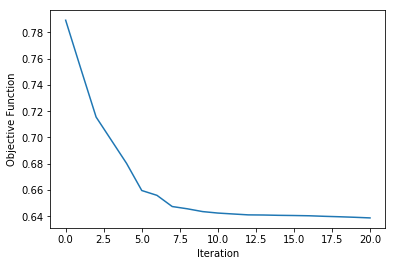

In [25]:
# Extract the summary from the returned LogisticRegressionModel instance trained
trainingSummary = mlrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
plt.plot(objectiveHistory)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.show()

In [26]:
# I'm not sure why this takes such a long time to run....

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.

predictions = mlrModel.transform(train2)
evaluator = MulticlassClassificationEvaluator()
print("training set AUC:" + str(evaluator.evaluate(predictions)))
#predictions.show()
#print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

testpreds = mlrModel.transform(test2)
print("testing set AUC:" + str(evaluator.evaluate(testpreds)))

training set AUC:0.7108363535253656
testing set AUC:0.6450570874700892


In [14]:
# Multiclass summary is not reported, so we'd have to adapt this code base on the MCE output
#trainingSummary.roc.show(n=10, truncate=15)
#roc = trainingSummary.roc.toPandas()
#plt.plot(roc['FPR'],roc['TPR'])
#plt.ylabel('False Positive Rate')
#plt.xlabel('True Positive Rate')
#plt.title('ROC Curve')
#plt.show()

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
test_error = 1.0 - accuracy
print("training set test_error:" + str(test_error))

ac2 = evaluator.evaluate(testpreds)
test2_err = 1.0-ac2
print("testing set test_error:" + str(test2_err))

training set test_error:0.24274967705985162
testing set test_error:0.29743693648059977


In [27]:
predictions.show(2)

+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|            filtered|            features|label|       rawPrediction|         probability|prediction|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|             0|STUNNING LUXURY 2...|          1|   0|      0|     0|     0|[stunning, luxury...|[stunning, luxury...|(10000,[0,1,2,3,4...|    0|[1.15251727036277...|[0.69991865722232...|       0.0|
|             0|The new downtown ...|          0|   0|      0|     0|     0|[the, new, downto...|[new, downtown, f...|(10000,[0,2,4,5,6...|    0|[1.72652872797096...|[0.79961037646738...|       0.0|
+----

In [30]:
from numpy import log

def log_loss(testpreds, labels = "label", probability = "probability"):    
    labs_and_preds = testpreds[labels, probability]
    
    return - labs_and_preds\
                .rdd\
                .map(lambda x: log(x[1][x[0]]))\
                .reduce(lambda x,y: x + y) / labs_and_preds.count()

In [31]:
log_loss(testpreds)

0.7095341146666223

In [ ]:
test_confusion_matrix_pd = testpreds.select("label", "prediction").toPandas()

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_confusion_matrix_pd["label"], test_confusion_matrix_pd["prediction"])

plt.figure()
class_names = ["low", "medium", "high"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False,
                      title='Confusion matrix, without normalization')

## Second method = TF-IDF method. 
* Calculate the term frequency and inverse term frequency.
* Issue: I'm not sure how to combine the feature vector with other features for the model...

In [11]:
# Same train/test setup as before

(train_set, test_set) = train3.randomSplit([0.8, 0.2], seed = 1337)
#train_set.show(2) # BULLCRAP

trythis = train3.toPandas()

from sklearn.model_selection import train_test_split
train, test = train_test_split(trythis, test_size=0.2, random_state=1337)
# BECAUSE STUPID PYSPARK DF DOES NOT WORKKKKKK

# Convert back to spark df
train2 = sqlCtx.createDataFrame(train)
train2.show(2)
test2 = sqlCtx.createDataFrame(test)

+--------------+--------------------+-----------+----+-------+------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|
+--------------+--------------------+-----------+----+-------+------+------+
|             0|STUNNING LUXURY 2...|          1|   0|      0|     0|     0|
|             0|The new downtown ...|          0|   0|      0|     0|     0|
+--------------+--------------------+-----------+----+-------+------+------+
only showing top 2 rows



DataFrame[interest_level: string, description: string, exclamation: bigint, star: bigint, missing: bigint, no fee: bigint, eq opp: bigint, labels: int]

In [21]:
# This is based only on the description, not the other parts that I've separated out. I'm not sure how to combine them
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


tokenizer = Tokenizer(inputCol="description", outputCol="words")
hashtf = HashingTF(numFeatures=2**16, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "interest_level", outputCol = "label")
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])
pipelineFit = pipeline.fit(train2)

In [23]:
from pyspark.sql.types import IntegerType

train_df = pipelineFit.transform(train2)
train_df = train_df.withColumn("label", train_df["interest_level"].cast(IntegerType()))

val_df = pipelineFit.transform(test2)
val_df = val_df.withColumn("label", val_df["interest_level"].cast(IntegerType()))
train_df.show(2)

+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|                  tf|            features|label|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
|             0|STUNNING LUXURY 2...|          1|   0|      0|     0|     0|[stunning, luxury...|(65536,[304,1431,...|(65536,[304,1431,...|    0|
|             0|The new downtown ...|          0|   0|      0|     0|     0|[the, new, downto...|(65536,[933,1577,...|(65536,[933,1577,...|    0|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+
only showing top 2 rows



+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|            filtered|            features|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+
|             0|STUNNING LUXURY 2...|          1|   0|      0|     0|     0|[stunning, luxury...|[stunning, luxury...|(10000,[0,1,2,3,4...|
|             0|The new downtown ...|          0|   0|      0|     0|     0|[the, new, downto...|[new, downtown, f...|(10000,[0,2,4,5,6...|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+
only showing top 2 rows



In [24]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

mlr = LogisticRegression(maxIter=100, family="multinomial")
mlrModel = mlr.fit(train_df)
predictions = mlrModel.transform(val_df)

evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
test_error = 1.0 - accuracy
print("testing set test_error:" + str(test_error))

testing set test_error:0.3609563367439975


In [27]:
predictions.show(4)

+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|               words|                  tf|            features|label|       rawPrediction|         probability|prediction|
+--------------+--------------------+-----------+----+-------+------+------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|             0|East Village 1 be...|          0|   0|      0|     0|     0|[east, village, 1...|(65536,[11171,123...|(65536,[11171,123...|    0|[9.34395931515826...|[0.99999217445811...|       0.0|
|             0|My commitment to ...|          0|   0|      0|     0|     0|[my, commitment, ...|(65536,[1821,3373...|(65536,[1821,3373...|    0|[25.0683985164497...|[0.99999999999999...|       0.0|
|    

In [44]:
from numpy import log

def log_loss(predictions, labels = "label", probability = "probability"):    
    labs_and_preds = predictions[labels, probability]
    
    return - labs_and_preds\
                .rdd\
                .map(lambda x: log(x[1][x[0]]))\
                .reduce(lambda x,y: x + y) / labs_and_preds.count()


In [45]:
log_loss(predictions) # what the hell?

7.619535819433436

This isn't a particularly awesome predictor...
Another way is to more directly create new variables based on the text

## Method 2: Making my own variables based on text characteristics
Specifically, I created variables for the presence of eye-catching punctuation (+ correlation) vs no description (- correlation)

In [44]:
train2.show(2)

+--------------+--------------------+-----------+----+-------+------+------+
|interest_level|         description|exclamation|star|missing|no fee|eq opp|
+--------------+--------------------+-----------+----+-------+------+------+
|             0|STUNNING LUXURY 2...|          1|   0|      0|     0|     0|
|             0|The new downtown ...|          0|   0|      0|     0|     0|
+--------------+--------------------+-----------+----+-------+------+------+
only showing top 2 rows



In [45]:

train2 = train2.withColumn("interest_level", train2["interest_level"].cast(IntegerType()))
# Make input/output vectors
input_data = train2.rdd.map(lambda x: (x[0], DenseVector(x[2:])))
df2 = sqlCtx.createDataFrame(input_data, ["label", "features"])
df2.show(2)

test2 = test2.withColumn("interest_level", test2["interest_level"].cast(IntegerType()))
val_data = test2.rdd.map(lambda x: (x[0], DenseVector(x[2:])))
val2 = sqlCtx.createDataFrame(val_data, ["label", "features"])
val2.show(2)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[1.0,0.0,0.0,0.0,...|
|    0|[0.0,0.0,0.0,0.0,...|
+-----+--------------------+
only showing top 2 rows

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[0.0,0.0,0.0,0.0,...|
|    0|[0.0,0.0,0.0,0.0,...|
+-----+--------------------+
only showing top 2 rows



In [46]:
mlrModel = mlr.fit(df2)
predictions = mlrModel.transform(val2)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.5681579903349201

Could potentially see which of these is most important....

## Method 3: WORD2VEC

In [11]:
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Learn a mapping from words to Vectors.
word2Vec = Word2Vec(vectorSize=100, minCount=5, inputCol="filtered", outputCol="features")

# Redo Pipeline
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, word2Vec])

In [12]:
# Fit the pipeline to training documents. This takes a couple of minutes.
pipelineFit = pipeline.fit(train3)
dataset = pipelineFit.transform(train3)


In [16]:
dataset.count()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36959)

In [15]:
# Same train/test setup as before

#(train_set, test_set) = train3.randomSplit([0.8, 0.2], seed = 1337)
#train_set.show(2) # BULLCRAP

trythis = dataset.toPandas() # I keep running out of memory when I do this!

from sklearn.model_selection import train_test_split
train, test = train_test_split(trythis, test_size=0.2, random_state=1337)
# BECAUSE STUPID PYSPARK DF DOES NOT WORKKKKKK

# Convert back to spark df
train2 = sqlCtx.createDataFrame(train)
train2.show(2)
test2 = sqlCtx.createDataFrame(test)

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 33552)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/conda/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/usr/loc

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36959)
Traceback (most recent call last):
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 533, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/protocol.py", line 336, in get_return_value
    format(target_id, ".", name))
py4j.protocol.Py4JError: An error occurred while calling o318.collectToPython

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop f

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36959)

In [ ]:
train2.show(2)

In [20]:
from pyspark.sql.types import IntegerType

train_df = train2.withColumn("label", train2["interest_level"].cast(IntegerType()))
val_df = test2.withColumn("label", test2["interest_level"].cast(IntegerType()))

train_df.show(2)

KeyboardInterrupt: 

In [19]:
# Build the model
mlr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0, family = "multinomial")

# Train model with Training Data
mlrModel = mlr.fit(train_df)

KeyboardInterrupt: 

In [ ]:
# I'm not sure why this takes such a long time to run....

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.

testpreds = mlrModel.transform(val_df)
evaluator = MulticlassClassificationEvaluator()
print("training set AUC:" + str(evaluator.evaluate(predictions)))
#predictions.show()
#print("areaUnderROC: " + str(trainingSummary.areaUnderROC))


In [ ]:
test_confusion_matrix_pd = testpreds.select("label", "prediction").toPandas()

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_confusion_matrix_pd["label"], test_confusion_matrix_pd["prediction"])

plt.figure()
class_names = ["low", "medium", "high"]
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False,
                      title='Confusion matrix, without normalization')

In [29]:
words2 = words.map(lambda x: x.strip()) # not necessary I don't think
words2.take(10)  

# Is there a way to split on caps?

['A',
 'Brand',
 'New',
 '3',
 'Bedroom',
 '1.5',
 'bath',
 'ApartmentEnjoy',
 'These',
 'Following']

In [30]:
topwords = words.map(lambda x: (x,1)) # add a count for each category so we can add them up
topwords.take(10)

[('A', 1),
 ('Brand', 1),
 ('New', 1),
 ('3', 1),
 ('Bedroom', 1),
 ('1.5', 1),
 ('bath', 1),
 ('ApartmentEnjoy', 1),
 ('These', 1),
 ('Following', 1)]

In [ ]:
topwords2 = topwords.reduceByKey(lambda x,y: x+y)\
.map(lambda x: (x[1], x[0]))\
.sortByKey(False)

topwords2.take(10) # Most of these are useless, so I should use the stopwords function

In [ ]:
topwords2.take(100)

* other things to do -- create a column that has a variable for contains/does not contain description. Also word count. 
* Need to remove stop words, potentially use inverse importance thing to identify good words. Then look at association of words with interest. 
* Finally, check out tuples/doubles that are useful. Eg: "equal opportunity lender"

In [69]:
# get rid of stop words
from pyspark.ml.feature import StopWordsRemover
def createDataFrame(words2, schema: StructType): DataFrame

#sentenceData = words2
#remover = StopWordsRemover(inputCol="description", outputCol="filtered")

NameError: name 'StructType' is not defined

In [70]:
words2.take(20)
#remover.transform(sentenceData).show()

['A',
 'Brand',
 'New',
 '3',
 'Bedroom',
 '1.5',
 'bath',
 'ApartmentEnjoy',
 'These',
 'Following',
 'Apartment',
 'Features',
 'As',
 'You',
 'Rent',
 'Here?',
 'Modern',
 'Designed',
 'Bathroom',
 'w/']

In [11]:
train_data_rdd = train_data_df.rdd
train_data_rdd.take(3)

[Row(bathrooms=1.5, bedrooms=3, building_id='53a5b119ba8f7b61d4e010512e0dfc85', created='2016-06-24 07:54:24', description="A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ", display_address='Metropolitan Avenue', features=[], latitude=40.7145, listing_id=7211212, longitude=-73.9425, manager_id='5ba989232d0489da1b5f2c45f6688adc', photos=['https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg', 'https://photos.renthop.com/2/7211212_7dfc4